Import necessary packages: Numpy, Pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

Note that the downside of using colab is that the resources such as GPUs and CPUs are given to you only temporarily. This means something in between 30-120min. Your code will be saved but variables and computed data stored in the memory reset. If you don't have a google account you will have to upload the datasets zip.train and zip.test after the CPU was reset. This exercise does not require a GPU and will also work on your own device, if you don't want to use colab.

In [2]:
path_to_train = 'zip.train'
path_to_test = 'zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

x_train, y_train = training_data[:,1:-1], training_data[:,0]
x_test, y_test = test_data[:,1:], test_data[:,0]

The following code helps you visualizing elements of the dataset. Try to understand how this works. This will probably be handy for other exercises as well.

In [3]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) #(1-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')


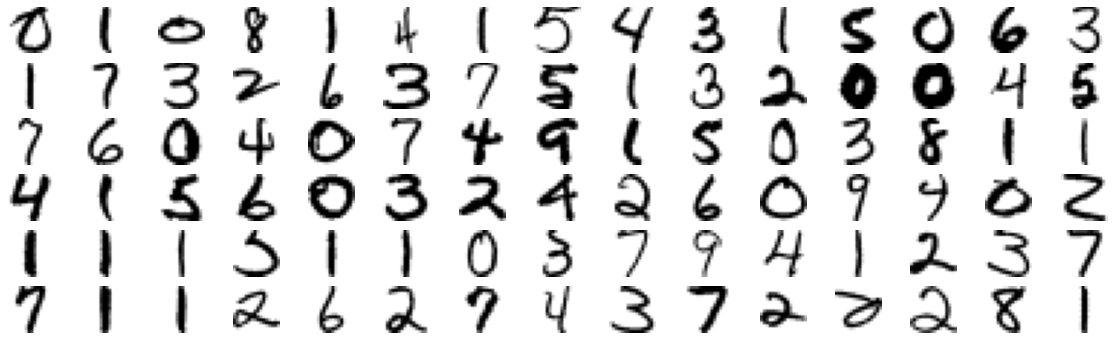

In [4]:
show_numbers(x_train)

Implement the KNearestNeighbors class.

a) Print out the accuracy.

b) Using Matplotlib, plot some of the numbers that are classified incorrectly.

c) Which k is optimal for the accuracy?

d) What are advantages and disadvantages for the k-NN-Classifier?

In [5]:
def accuracy(y_true, y_pred):
    if y_true.shape != y_pred.shape:
        raise ValueError(f"Invalid shapes received, y_trues shape is {y_true.shape} while y_pres shape is {y_pred.shape}.")
    return (1 / y_true.shape[0]) * np.sum(y_true == y_pred)


class KNearestNeighbors():
    '''
    Think about defining more functions that will help you building this algorithm.
    Optimally, one that takes in k and a test image as a parameter.
    '''
    def __init__(self, k, num_classes):
        self.k = k
        self.num_classes = num_classes
        
    def fit(self, x, y):
        self.x = x
        self.y = y
    
    def squared_euclidean_distance_mat(self, x_1, x_2):
      '''
      np.sum(x, axis = 1) will be summing all elements over the pixel dimension (axis = 1)
      '''
      return np.sum((x_1-x_2)**2, axis = 0)
    
    def predict(self, x):
        predictions = []
        for it, pred_row in enumerate(x):
            if it % 100 == 0:
                print(f"k={self.k} --> Predicted observations: {it}/{x.shape[0]}")
            knn = []
            for train_x, train_y in zip(self.x, self.y):
                dist = self.squared_euclidean_distance(pred_row, train_x)
                if len(knn) >= self.k and dist > knn[-1][0]:
                    continue

                hasInserted = False
                for i in range(len(knn)):
                    if knn[i][0] > dist:
                        knn.insert(i, (dist, train_y))
                        hasInserted = True
                        break

                if not hasInserted and len(knn) < self.k:
                    knn.append((dist, train_y))

                if len(knn) > self.k:
                    knn.pop()
                    
            classes = [0 for i in range(self.num_classes)]
            for neighbour in knn:
                classes[int(neighbour[1])] += 1
                
            predictions.append(np.argmax(classes))
            
        return np.array(predictions)


In [6]:
accs = []
ks = [i for i in range(1, 11)]
for k in ks:
    kNN = KNearestNeighbors(k, int(max(y_train)) + 1)
    kNN.fit(x_train, y_train)
    y_pred = kNN.predict(x_test)
    accs.append(accuracy(y_test, y_pred))

k=1 --> Predicted observations: 0/2007
k=1 --> Predicted observations: 100/2007
k=1 --> Predicted observations: 200/2007
k=1 --> Predicted observations: 300/2007
k=1 --> Predicted observations: 400/2007
k=1 --> Predicted observations: 500/2007
k=1 --> Predicted observations: 600/2007
k=1 --> Predicted observations: 700/2007
k=1 --> Predicted observations: 800/2007
k=1 --> Predicted observations: 900/2007
k=1 --> Predicted observations: 1000/2007
k=1 --> Predicted observations: 1100/2007
k=1 --> Predicted observations: 1200/2007
k=1 --> Predicted observations: 1300/2007
k=1 --> Predicted observations: 1400/2007
k=1 --> Predicted observations: 1500/2007
k=1 --> Predicted observations: 1600/2007
k=1 --> Predicted observations: 1700/2007
k=1 --> Predicted observations: 1800/2007
k=1 --> Predicted observations: 1900/2007
k=1 --> Predicted observations: 2000/2007
k=2 --> Predicted observations: 0/2007
k=2 --> Predicted observations: 100/2007
k=2 --> Predicted observations: 200/2007
k=2 --> P

k=10 --> Predicted observations: 900/2007
k=10 --> Predicted observations: 1000/2007
k=10 --> Predicted observations: 1100/2007
k=10 --> Predicted observations: 1200/2007
k=10 --> Predicted observations: 1300/2007
k=10 --> Predicted observations: 1400/2007
k=10 --> Predicted observations: 1500/2007
k=10 --> Predicted observations: 1600/2007
k=10 --> Predicted observations: 1700/2007
k=10 --> Predicted observations: 1800/2007
k=10 --> Predicted observations: 1900/2007
k=10 --> Predicted observations: 2000/2007


In [11]:
a = np.array([[1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])
b = np.array([[1], 
              [2], 
              [3]])

print(b - a)
print(np.pow(np.sum(b - a, axis=1), 2))

[[ 0 -1 -2]
 [-1 -2 -3]
 [-3 -4 -5]]
[ -3  -6 -12]


In [10]:
print(b.shape)

(3,)


In [12]:
print(accs)

[0.9436970602889885, 0.9412057797708021, 0.9446935724962631, 0.9431988041853512, 0.9446935724962631, 0.9387144992526159, 0.9417040358744394, 0.9407075236671649, 0.937219730941704, 0.9357249626307922]
